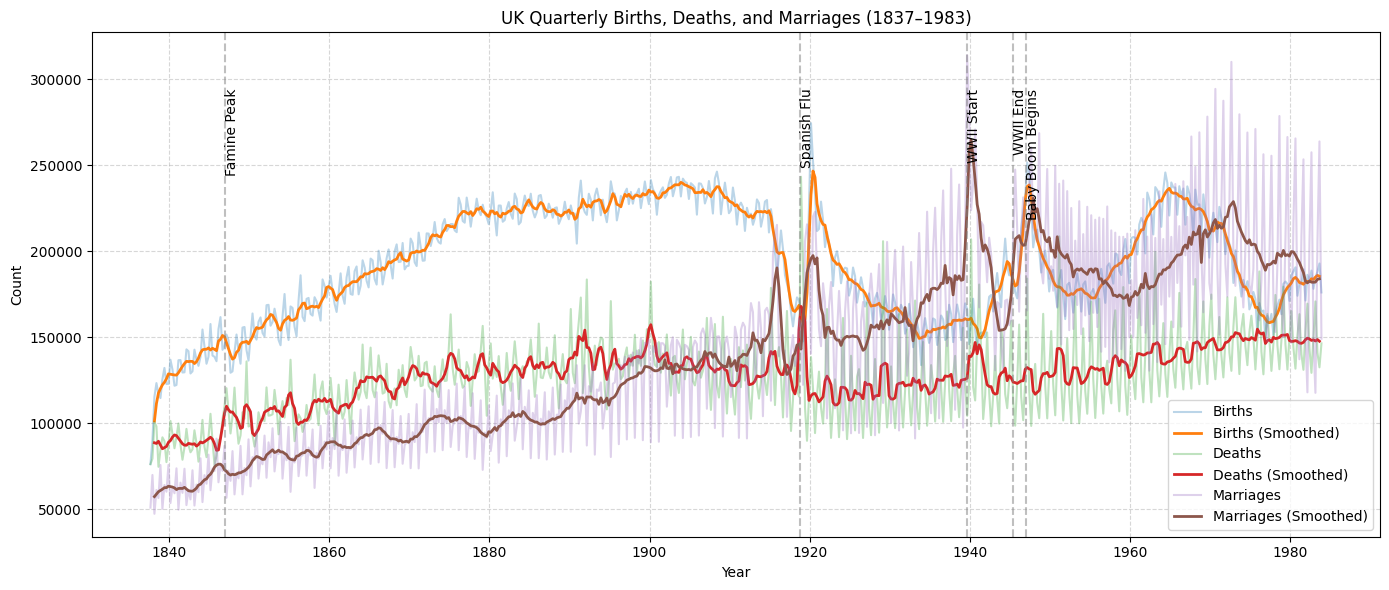

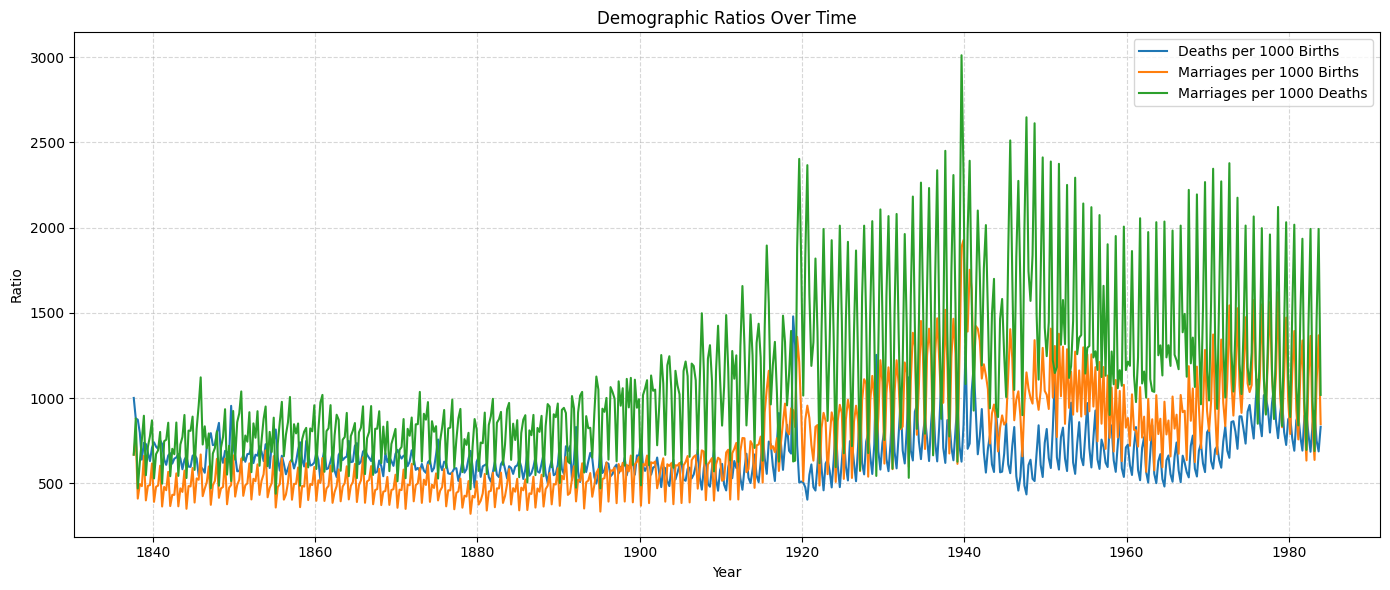

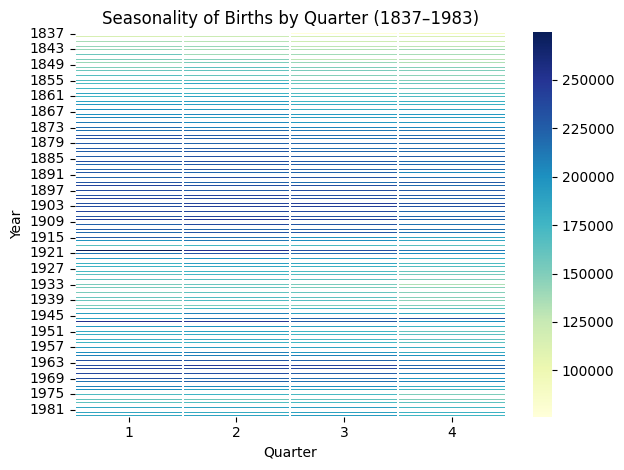

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)

# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')

# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()

# Compute 4-quarter centered moving averages
df['Births_Smoothed'] = df['Births'].rolling(window=4, center=True).mean()
df['Marriages_Smoothed'] = df['Marriages'].rolling(window=4, center=True).mean()
df['Deaths_Smoothed'] = df['Deaths'].rolling(window=4, center=True).mean()

# Compute demographic ratios
df['Deaths_per_Birth'] = df['Deaths'] / df['Births'] * 1000
df['Marriages_per_Birth'] = df['Marriages'] / df['Births'] * 1000
df['Marriages_per_Death'] = df['Marriages'] / df['Deaths'] * 1000

# Plot raw and smoothed time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Births'], label='Births', alpha=0.3)
plt.plot(df.index, df['Births_Smoothed'], label='Births (Smoothed)', linewidth=2)
plt.plot(df.index, df['Deaths'], label='Deaths', alpha=0.3)
plt.plot(df.index, df['Deaths_Smoothed'], label='Deaths (Smoothed)', linewidth=2)
plt.plot(df.index, df['Marriages'], label='Marriages', alpha=0.3)
plt.plot(df.index, df['Marriages_Smoothed'], label='Marriages (Smoothed)', linewidth=2)

# Annotated events
events = {
    '1847-01-01': 'Famine Peak',
    '1918-10-01': 'Spanish Flu',
    '1939-09-01': 'WWII Start',
    '1945-05-01': 'WWII End',
    '1947-01-01': 'Baby Boom Begins'
}
for date_str, label in events.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color='gray', linestyle='--', alpha=0.5)
    plt.text(date, plt.ylim()[1]*0.9, label, rotation=90, verticalalignment='top')

plt.title("UK Quarterly Births, Deaths, and Marriages (1837–1983)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot demographic ratios
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Deaths_per_Birth'], label='Deaths per 1000 Births')
plt.plot(df.index, df['Marriages_per_Birth'], label='Marriages per 1000 Births')
plt.plot(df.index, df['Marriages_per_Death'], label='Marriages per 1000 Deaths')
plt.title("Demographic Ratios Over Time")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: seasonal heatmap by decade
df['Year'] = df.index.year
df['Quarter_Label'] = df.index.to_period('Q').strftime('%q')

pivot_births = df.pivot_table(values='Births', index='Year', columns='Quarter_Label')
sns.heatmap(pivot_births, cmap="YlGnBu", linewidths=0.1)
plt.title("Seasonality of Births by Quarter (1837–1983)")
plt.ylabel("Year")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()


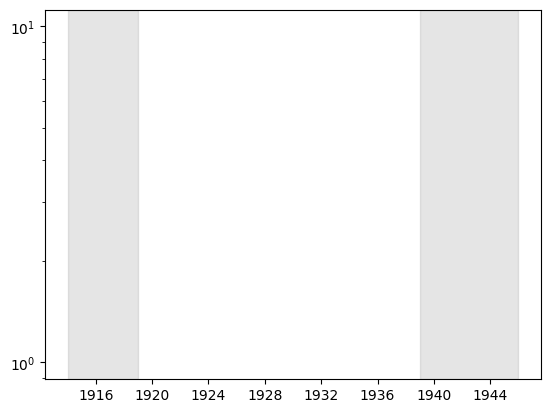

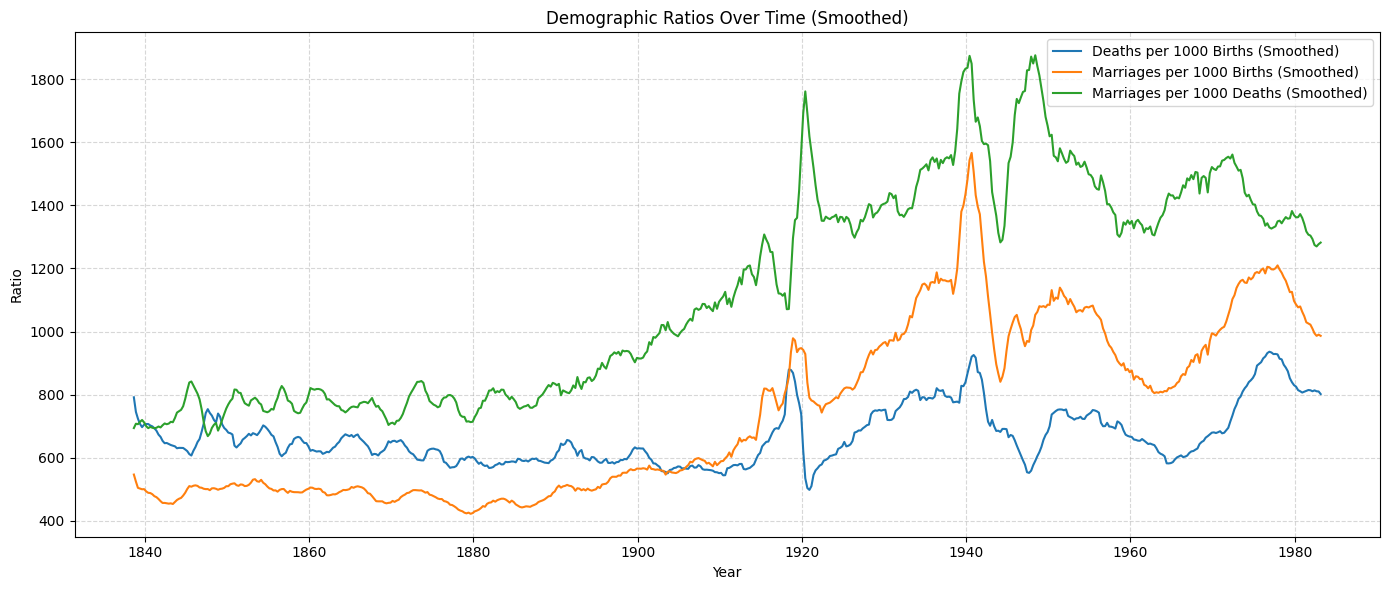

In [9]:
df['Deaths_per_Birth_Smoothed'] = df['Deaths_per_Birth'].rolling(window=8, center=True).mean()
df['Marriages_per_Birth_Smoothed'] = df['Marriages_per_Birth'].rolling(window=8, center=True).mean()
df['Marriages_per_Death_Smoothed'] = df['Marriages_per_Death'].rolling(window=8, center=True).mean()
plt.axvspan(pd.to_datetime("1914-01-01"), pd.to_datetime("1918-12-31"), color='gray', alpha=0.2)
plt.axvspan(pd.to_datetime("1939-01-01"), pd.to_datetime("1945-12-31"), color='gray', alpha=0.2)
plt.yscale('log')
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Deaths_per_Birth_Smoothed'], label='Deaths per 1000 Births (Smoothed)')
plt.plot(df.index, df['Marriages_per_Birth_Smoothed'], label='Marriages per 1000 Births (Smoothed)')
plt.plot(df.index, df['Marriages_per_Death_Smoothed'], label='Marriages per 1000 Deaths (Smoothed)')
plt.title("Demographic Ratios Over Time (Smoothed)")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Load your original data
file_name = "Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)

# Fill forward missing year values
df['Year'] = df['Year'].ffill()

# Map quarters
quarter_map = {'Mar': 'Q1', 'Jun': 'Q2', 'Sep': 'Q3', 'Dec': 'Q4'}
df['Quarter'] = df['Quarter'].map(quarter_map)

# Create datetime index
df['Date'] = pd.to_datetime(df['Year'].astype(int).astype(str) + df['Quarter'], format='%YQ%q')
df = df.sort_values('Date').set_index('Date')

# Drop incomplete rows
df = df[['Births', 'Marriages', 'Deaths']].dropna()

# Smooth series using 4-quarter centered moving average
df['Births_Smoothed'] = df['Births'].rolling(window=4, center=True).mean()
df['Marriages_Smoothed'] = df['Marriages'].rolling(window=4, center=True).mean()
df['Deaths_Smoothed'] = df['Deaths'].rolling(window=4, center=True).mean()

# Compute smoothed demographic ratios
df['Deaths_per_Birth_Smoothed'] = df['Deaths_Smoothed'] / df['Births_Smoothed'] * 1000
df['Marriages_per_Birth_Smoothed'] = df['Marriages_Smoothed'] / df['Births_Smoothed'] * 1000
df['Marriages_per_Death_Smoothed'] = df['Marriages_Smoothed'] / df['Deaths_Smoothed'] * 1000

# Drop rows with missing smoothed values
df = df.dropna(subset=[
    'Deaths_per_Birth_Smoothed',
    'Marriages_per_Birth_Smoothed',
    'Marriages_per_Death_Smoothed'
])

# Prepare data for change point detection
ratios = ['Deaths_per_Birth_Smoothed', 'Marriages_per_Birth_Smoothed', 'Marriages_per_Death_Smoothed']
X = df[ratios].values

# Detect structural breaks using PELT
model = rpt.Pelt(model="rbf").fit(X)
breaks = model.predict(pen=10)

# Convert break indices to dates
break_dates = df.index[breaks[:-1]]

# Plot the smoothed demographic ratios with structural break markers
plt.figure(figsize=(14, 6))
for col in ratios:
    plt.plot(df.index, df[col], label=col)

for date in break_dates:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

plt.title("Smoothed Demographic Ratios with Structural Breaks")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print break dates
print("Detected structural breaks at:")
for date in break_dates:
    print(date.strftime("%Y-%m"))


ValueError: 'q' is a bad directive in format '%YQ%q'

In [11]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00


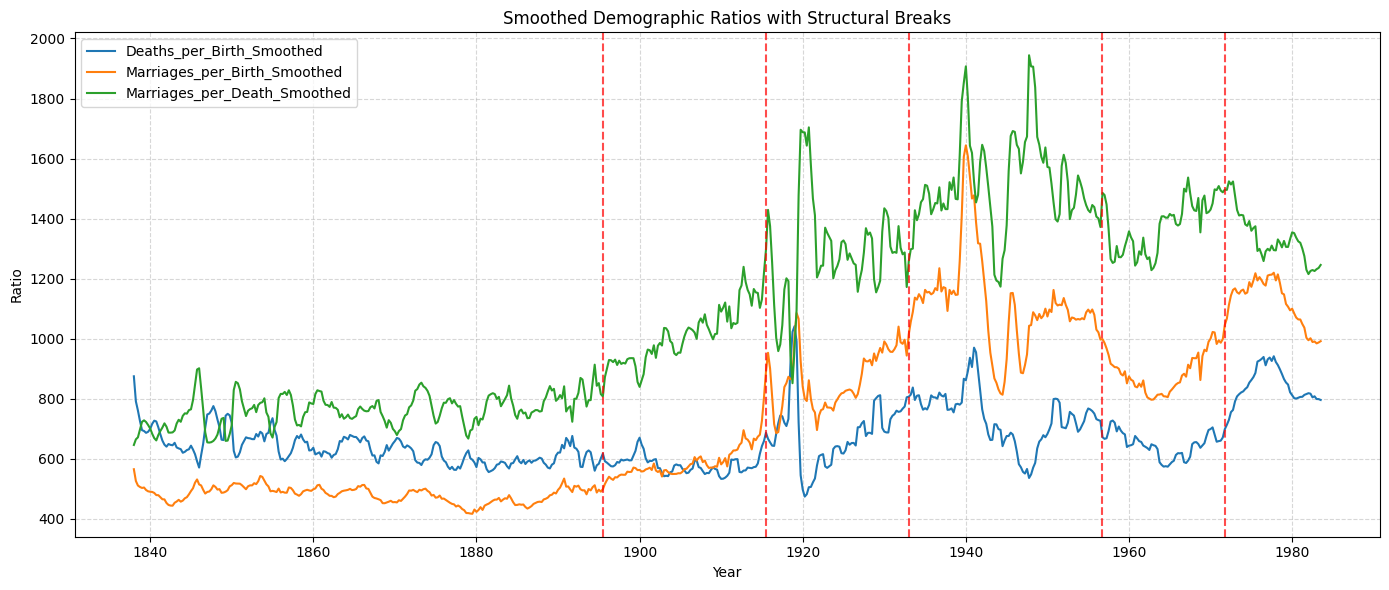

Detected structural breaks:
1895-07
1915-07
1933-01
1956-10
1971-10


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Load your original data
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)

# Forward-fill missing year values
df['Year'] = df['Year'].ffill()

# Map quarters to first month of quarter
quarter_to_month = {'Mar': '01', 'Jun': '04', 'Sep': '07', 'Dec': '10'}
df['Month'] = df['Quarter'].map(quarter_to_month)

# Create a valid datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(int).astype(str) + '-' + df['Month'])

# Sort and set index
df = df.sort_values('Date').set_index('Date')

# Clean and drop incomplete rows
df = df[['Births', 'Marriages', 'Deaths']].dropna()

# Compute centered 4-quarter moving averages
df['Births_Smoothed'] = df['Births'].rolling(window=4, center=True).mean()
df['Marriages_Smoothed'] = df['Marriages'].rolling(window=4, center=True).mean()
df['Deaths_Smoothed'] = df['Deaths'].rolling(window=4, center=True).mean()

# Compute smoothed demographic ratios
df['Deaths_per_Birth_Smoothed'] = df['Deaths_Smoothed'] / df['Births_Smoothed'] * 1000
df['Marriages_per_Birth_Smoothed'] = df['Marriages_Smoothed'] / df['Births_Smoothed'] * 1000
df['Marriages_per_Death_Smoothed'] = df['Marriages_Smoothed'] / df['Deaths_Smoothed'] * 1000

# Drop rows with missing smoothed values
df = df.dropna(subset=[
    'Deaths_per_Birth_Smoothed',
    'Marriages_per_Birth_Smoothed',
    'Marriages_per_Death_Smoothed'
])

# Prepare for changepoint detection
ratios = ['Deaths_per_Birth_Smoothed', 'Marriages_per_Birth_Smoothed', 'Marriages_per_Death_Smoothed']
X = df[ratios].values

# Use ruptures to detect structural breaks
model = rpt.Pelt(model="rbf").fit(X)
breaks = model.predict(pen=10)

# Convert indices to dates
break_dates = df.index[breaks[:-1]]

# Plot smoothed ratios with structural break annotations
plt.figure(figsize=(14, 6))
for col in ratios:
    plt.plot(df.index, df[col], label=col)

for date in break_dates:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

plt.title("Smoothed Demographic Ratios with Structural Breaks")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print detected break dates
print("Detected structural breaks:")
for date in break_dates:
    print(date.strftime("%Y-%m"))


<ipython-input-14-0ce7dafcbd63>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df.resample('Y').sum()


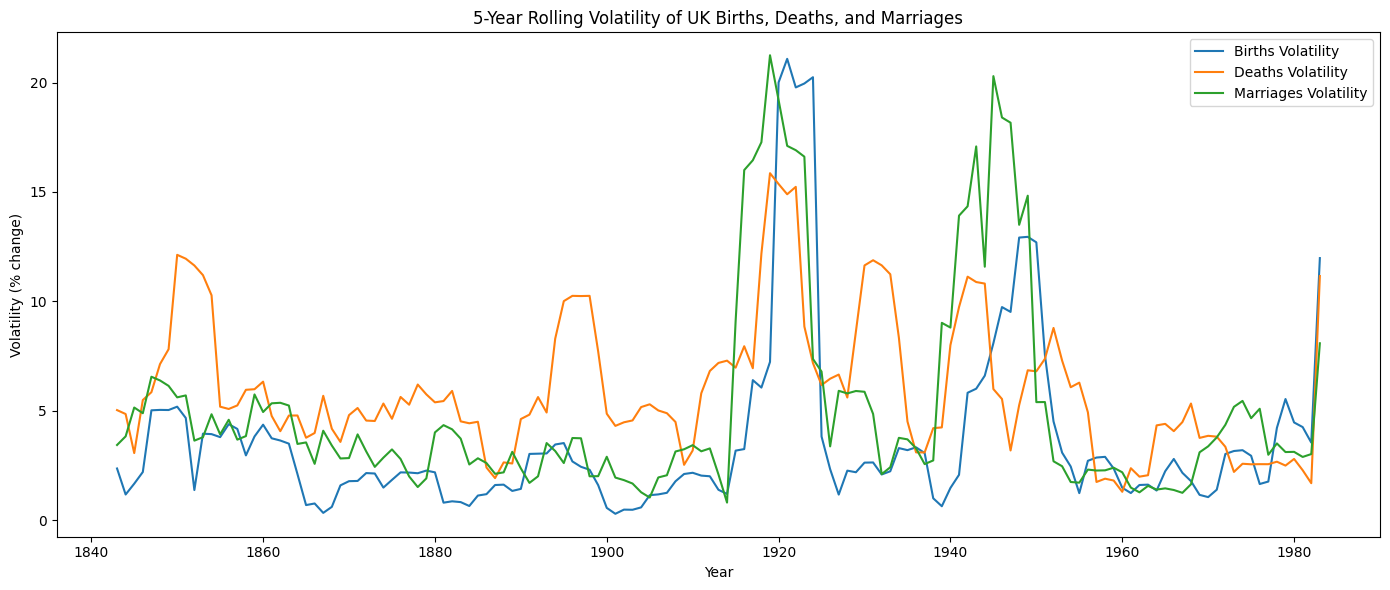

In [14]:
# Yearly data: assume your DataFrame has 'Year' as index and yearly aggregated values
yearly_df = df.resample('Y').sum()

# Calculate year-over-year percentage change
vol_df = yearly_df.pct_change() * 100

# Calculate 5-year rolling standard deviation (volatility)
rolling_vol = vol_df.rolling(window=5).std()

# Plot volatility
plt.figure(figsize=(14, 6))
plt.plot(rolling_vol.index.year, rolling_vol['Births'], label='Births Volatility')
plt.plot(rolling_vol.index.year, rolling_vol['Deaths'], label='Deaths Volatility')
plt.plot(rolling_vol.index.year, rolling_vol['Marriages'], label='Marriages Volatility')
plt.title("5-Year Rolling Volatility of UK Births, Deaths, and Marriages")
plt.xlabel("Year")
plt.ylabel("Volatility (% change)")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-17-523d8d80cb0d>:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample("Y").sum()


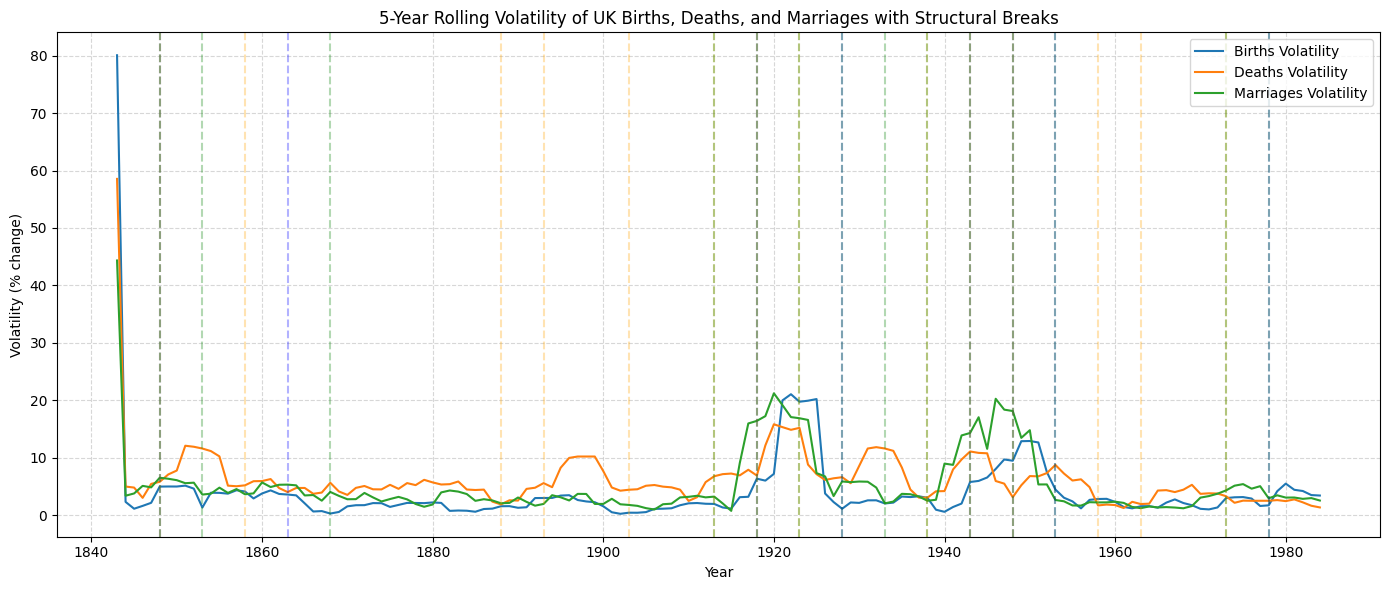

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Load your cleaned volatility data (already created earlier)
# This assumes your DataFrame is named `df` and indexed by date

# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)



# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')



# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()


# First, compute year-over-year percent change and 5-year rolling volatility
df_yearly = df.resample("Y").sum()
df_pct = df_yearly.pct_change() * 100
df_vol = df_pct.rolling(window=5).std()

# Rename for clarity
df_vol.columns = ['Births Volatility', 'Marriages Volatility', 'Deaths Volatility']
df_vol = df_vol.dropna()

# Function to detect structural breaks using PELT
def detect_breaks(series, penalty=5):
    algo = rpt.Pelt(model="l2").fit(series.values)
    result = algo.predict(pen=penalty)
    return result[:-1]  # drop the last index (end of signal)

# Apply ruptures to each series
breaks_births = detect_breaks(df_vol['Births Volatility'], penalty=6)
breaks_deaths = detect_breaks(df_vol['Deaths Volatility'], penalty=6)
breaks_marriages = detect_breaks(df_vol['Marriages Volatility'], penalty=6)

# Plot all series with breakpoints
plt.figure(figsize=(14, 6))
plt.plot(df_vol.index, df_vol['Births Volatility'], label='Births Volatility')
plt.plot(df_vol.index, df_vol['Deaths Volatility'], label='Deaths Volatility')
plt.plot(df_vol.index, df_vol['Marriages Volatility'], label='Marriages Volatility')

# Add breakpoints
for idx in breaks_births:
    plt.axvline(df_vol.index[idx], color='blue', linestyle='--', alpha=0.3)
for idx in breaks_deaths:
    plt.axvline(df_vol.index[idx], color='orange', linestyle='--', alpha=0.3)
for idx in breaks_marriages:
    plt.axvline(df_vol.index[idx], color='green', linestyle='--', alpha=0.3)

plt.title("5-Year Rolling Volatility of UK Births, Deaths, and Marriages with Structural Breaks")
plt.xlabel("Year")
plt.ylabel("Volatility (% change)")
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


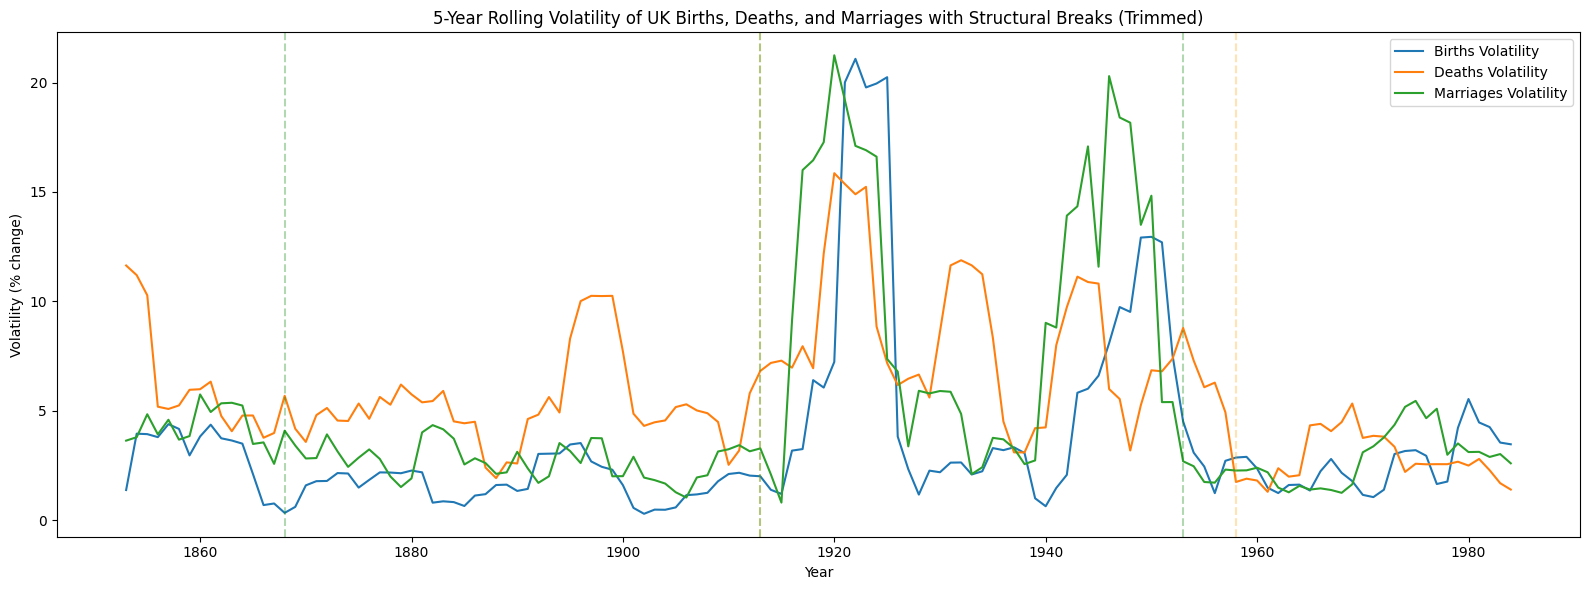

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt

# Assuming df_vol contains volatility columns with datetime index
trim_years = 10
df_trimmed = df_vol[df_vol.index >= (df_vol.index.min() + pd.DateOffset(years=trim_years))]

# Re-run rupture detection on trimmed data
algo = rpt.Pelt(model="rbf").fit(df_trimmed['Births Volatility'].values)
birth_breaks = algo.predict(pen=5)

algo = rpt.Pelt(model="rbf").fit(df_trimmed['Deaths Volatility'].values)
death_breaks = algo.predict(pen=5)

algo = rpt.Pelt(model="rbf").fit(df_trimmed['Marriages Volatility'].values)
marriage_breaks = algo.predict(pen=5)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(df_trimmed.index, df_trimmed['Births Volatility'], label='Births Volatility')
plt.plot(df_trimmed.index, df_trimmed['Deaths Volatility'], label='Deaths Volatility')
plt.plot(df_trimmed.index, df_trimmed['Marriages Volatility'], label='Marriages Volatility')

for idx in birth_breaks:
    if idx < len(df_trimmed):
        plt.axvline(df_trimmed.index[idx], color='blue', linestyle='--', alpha=0.3)
for idx in death_breaks:
    if idx < len(df_trimmed):
        plt.axvline(df_trimmed.index[idx], color='orange', linestyle='--', alpha=0.3)
for idx in marriage_breaks:
    if idx < len(df_trimmed):
        plt.axvline(df_trimmed.index[idx], color='green', linestyle='--', alpha=0.3)

plt.title("5-Year Rolling Volatility of UK Births, Deaths, and Marriages with Structural Breaks (Trimmed)")
plt.ylabel("Volatility (% change)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_vol.head()

,Births Volatility,Marriages Volatility,Deaths Volatility
Date,,,
1842-12-31,80.045918,44.347330,58.540605
1843-12-31,2.355908,3.429606,5.024918
1844-12-31,1.166598,3.824209,4.845850
1845-12-31,1.660356,5.143028,3.059709
1846-12-31,2.194701,4.882611,5.485008


In [30]:
import pandas as pd
import numpy as np

# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)



# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')



# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()



# Normalize variables for state-space modeling
df['births_z'] = (df['Births'] - df['Births'].mean()) / df['Births'].std()
df['deaths_z'] = (df['Deaths'] - df['Deaths'].mean()) / df['Deaths'].std()
df['marriages_z'] = (df['Marriages'] - df['Marriages'].mean()) / df['Marriages'].std()


In [37]:
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

# Reshape into panel format: index = [year, variable]
panel_df = df.set_index('year')[['Births', 'Deaths', 'Marriages']]

# We'll treat 'deaths' as the dependent variable
panel_data = panel_df.copy()
panel_data['const'] = 1  # intercept
panel_data = panel_data.reset_index()
panel_data = panel_data.set_index(['year'])

# Run panel regression: deaths ~ births + marriages
from statsmodels.api import OLS

X = panel_data[['Births', 'Marriages']]
y = panel_data['Deaths']
X = add_constant(X)

ols_model = OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     59.25
Date:                Mon, 05 May 2025   Prob (F-statistic):           3.77e-24
Time:                        22:01:21   Log-Likelihood:                -6673.2
No. Observations:                 586   AIC:                         1.335e+04
Df Residuals:                     583   BIC:                         1.337e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.782e+04   5495.790     12.340      0.0

In [35]:
df.head()

,Date,Births,Marriages,Deaths,births_z,deaths_z,marriages_z,year
0,1837-09-01,76117,50830,76155,-3.546661,-2.163457,-1.606376,1837
1,1837-12-01,90151,69853,79335,-3.118720,-2.027776,-1.265115,1837
2,1838-03-01,115293,47252,100688,-2.352061,-1.116708,-1.670563,1838
3,1838-06-01,123275,61088,98090,-2.108665,-1.227557,-1.422354,1838
4,1838-09-01,116838,56412,74604,-2.304949,-2.229633,-1.506238,1838


                        Unobserved Components Results                         
Dep. Variable:                 Deaths   No. Observations:                  586
Model:                    local level   Log Likelihood               -6608.443
Date:                Mon, 05 May 2025   AIC                          13224.887
Time:                        22:01:55   BIC                          13242.373
Sample:                             0   HQIC                         13231.702
                                - 586                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.771e+08   1.73e-11   1.03e+19      0.000    1.77e+08    1.77e+08
sigma2.level      9.424e+07    5.4e-11   1.74e+18      0.000    9.42e+07    9.42e+07
beta.Births          0.3654 

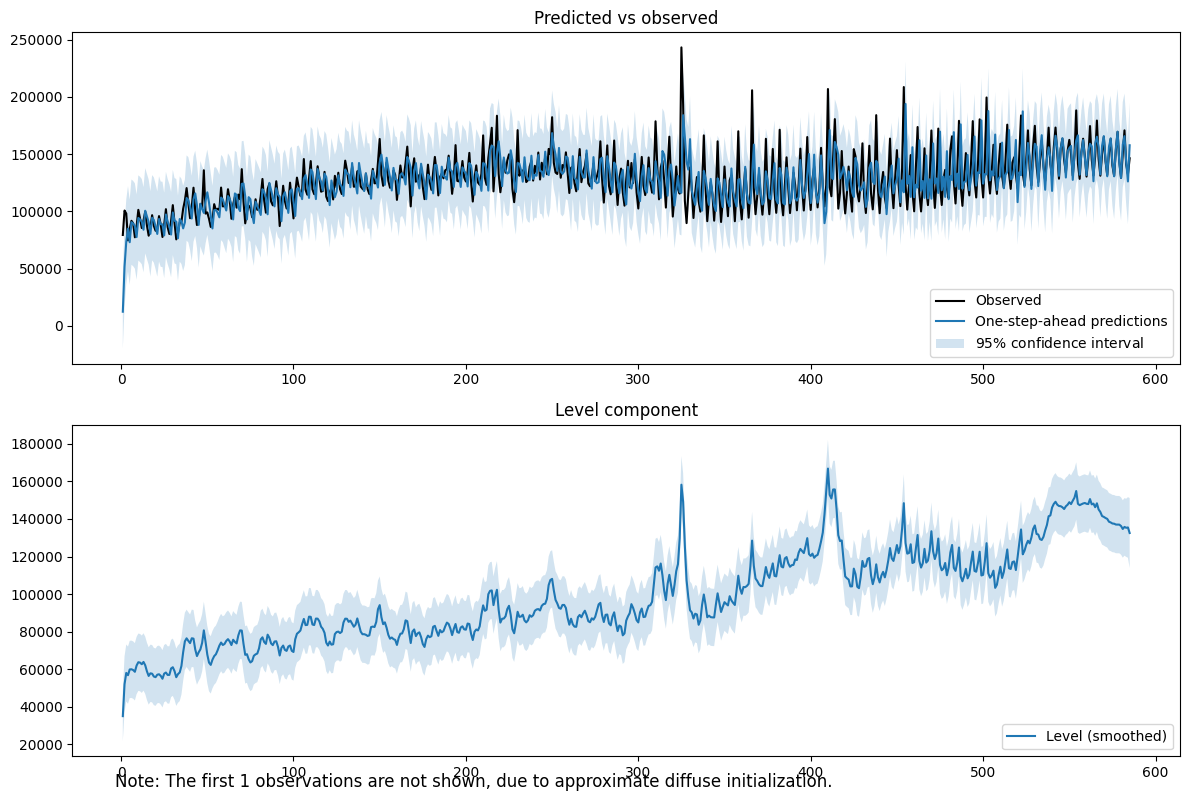

In [38]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

# We'll model deaths as trend + regression on births and marriages
mod = UnobservedComponents(endog=df['Deaths'],
                           level='local level',
                           exog=df[['Births', 'Marriages']])

res = mod.fit()
print(res.summary())

# Plot smoothed states and forecast
import matplotlib.pyplot as plt

res.plot_components(legend_loc='lower right', figsize=(12, 8))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


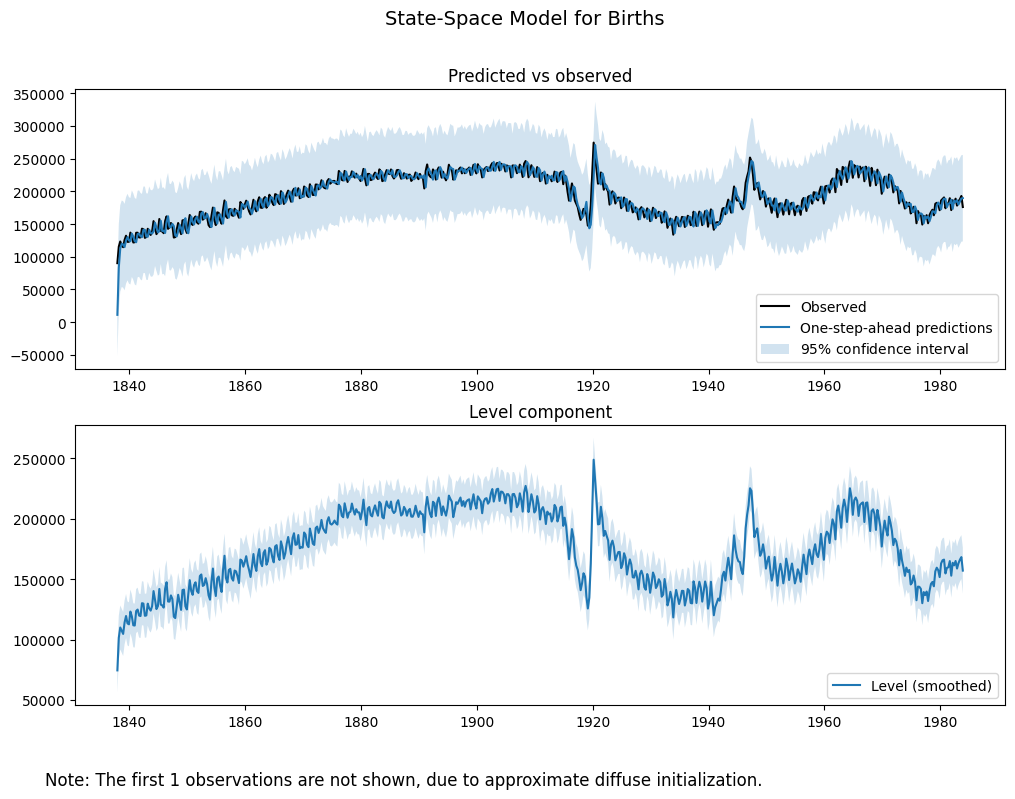

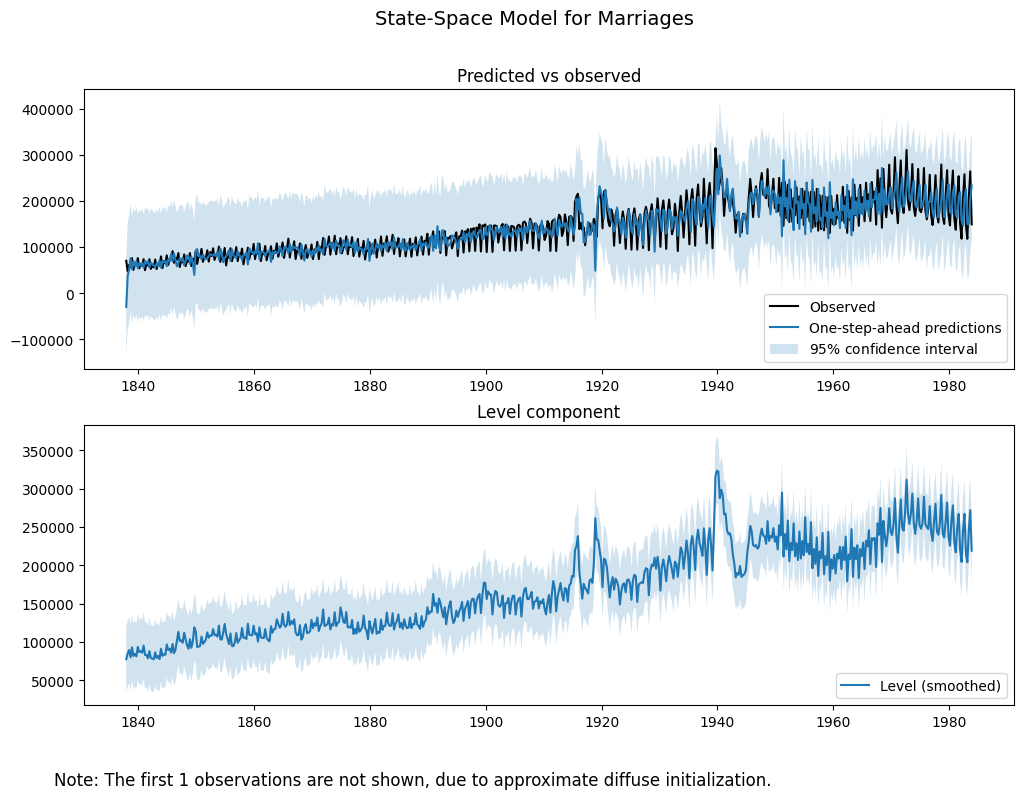

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)



# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')



# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()


# Define the models for Births and Marriages using the same structure as Deaths
model_births = UnobservedComponents(df["Births"], level="local level", exog=df[["Deaths", "Marriages"]])
model_marriages = UnobservedComponents(df["Marriages"], level="local level", exog=df[["Births", "Deaths"]])

# Fit the models
results_births = model_births.fit(disp=False)
results_marriages = model_marriages.fit(disp=False)

# Plot results for Births
fig_births = results_births.plot_components(legend_loc='lower right', figsize=(12, 8))
fig_births.suptitle("State-Space Model for Births", fontsize=14)

# Plot results for Marriages
fig_marriages = results_marriages.plot_components(legend_loc='lower right', figsize=(12, 8))
fig_marriages.suptitle("State-Space Model for Marriages", fontsize=14)

# Display both figures
plt.show()


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)



# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')



# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()

df = df.asfreq('QE')  # Ensure quarterly frequency

# Optional: interpolate missing values
df.interpolate(method='linear', inplace=True)

# Define a function to run and plot state space model
def run_ucm(series_name, title):
    series = df[series_name]

    # Fit the local level model
    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    # Plot predicted vs observed
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'State-Space Model for {title}', fontsize=16)

    # One-step-ahead predictions
    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    axes[0].plot(series.index, series, label='Observed', color='black', linewidth=1)
    axes[0].plot(mean.index, mean, label='One-step-ahead predictions', color='steelblue')
    axes[0].fill_between(mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='steelblue', alpha=0.3)
    axes[0].legend()
    axes[0].set_title('Predicted vs observed')

    # Smoothed level
    level = results.level_smoothed
    level_ci = results.get_smoothed_conf_int(alpha=0.05)

    axes[1].plot(series.index, level, label='Level (smoothed)', color='steelblue')
    axes[1].fill_between(series.index,
                         level_ci['level_smoothed_lower'],
                         level_ci['level_smoothed_upper'],
                         color='steelblue', alpha=0.3)
    axes[1].set_title('Level component')
    axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

# Run the model for each variable
run_ucm('Births', 'Births')
run_ucm('Deaths', 'Deaths')
run_ucm('Marriages', 'Marriages')


ValueError: 'shape' elements cannot be negative

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

def run_ucm(df, series_name, title):
    series = df[series_name]

    # Fit the local level model
    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    # Plot predicted vs observed
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'State-Space Model for {title}', fontsize=16)

    # One-step-ahead predictions
    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    axes[0].plot(series.index, series, label='Observed', color='black', linewidth=1)
    axes[0].plot(mean.index, mean, label='One-step-ahead predictions', color='steelblue')
    axes[0].fill_between(mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='steelblue', alpha=0.3)
    axes[0].legend()
    axes[0].set_title('Predicted vs observed')

    # Smoothed level
    level = results.level_smoothed
    level_ci = results.get_smoothed_conf_int(alpha=0.05)

    axes[1].plot(series.index, level, label='Level (smoothed)', color='steelblue')
    axes[1].fill_between(series.index,
                         level_ci['level_smoothed_lower'],
                         level_ci['level_smoothed_upper'],
                         color='steelblue', alpha=0.3)
    axes[1].set_title('Level component')
    axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.savefig(f'statespace_{series_name.lower()}.png')
    plt.show()
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

    # Drop any NaNs before calculating metrics
    observed = series.loc[mean.index].dropna()
    predicted = mean.loc[observed.index].dropna()

    # Align lengths
    observed, predicted = observed.align(predicted, join='inner')

    # Compute metrics
    mae = mean_absolute_error(observed, predicted)
    mse = mean_squared_error(observed, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(observed, predicted)

    print(f"\nError Metrics for {title}:")
    print(f"  MAE  = {mae:,.0f}")
    print(f"  RMSE = {rmse:,.0f}")
    print(f"  MAPE = {mape:.2%}")


# Example usage:
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')
# df = df.asfreq('Q')
# run_ucm(df, 'Births', 'Births')
# run_ucm(df, 'Deaths', 'Deaths')
# run_ucm(df, 'Marriages', 'Marriages')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


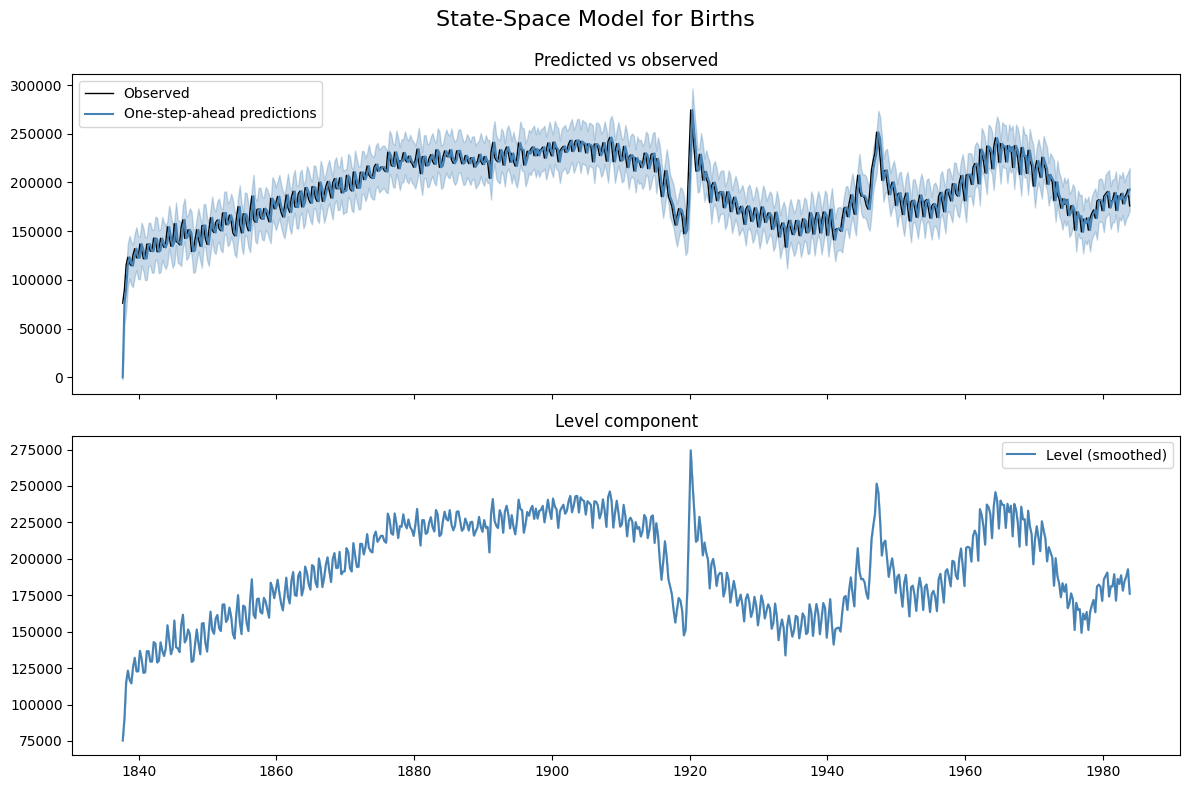


Error Metrics for Births:
  MAE  = 9,177
  RMSE = 11,608
  MAPE = 5.02%


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def run_ucm(df, series_name, title):
    series = df[series_name].dropna()

    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    # One-step-ahead predictions
    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'State-Space Model for {title}', fontsize=16)

    # Plot observed vs predicted
    axes[0].plot(series.index, series, label='Observed', color='black', linewidth=1)
    axes[0].plot(mean.index, mean, label='One-step-ahead predictions', color='steelblue')
    axes[0].fill_between(mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='steelblue', alpha=0.3)
    axes[0].legend()
    axes[0].set_title('Predicted vs observed')

    # Extract smoothed level from results.smoothed_state
    smoothed_level = results.smoothed_state[0]  # Index 0 is level component
    smoothed_index = series.index

    # Smoothed level confidence intervals
    level_var = results.smoothed_state_cov[0, 0, :]  # variance of level
    level_std = np.sqrt(level_var)
    lower = smoothed_level - 1.96 * level_std
    upper = smoothed_level + 1.96 * level_std

    axes[1].plot(smoothed_index, smoothed_level, label='Level (smoothed)', color='steelblue')
    axes[1].fill_between(smoothed_index, lower, upper, color='steelblue', alpha=0.3)
    axes[1].set_title('Level component')
    axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.savefig(f'statespace_{series_name.lower()}.png')
    plt.show()

    # Error metrics
    observed = series.loc[mean.index].dropna()
    predicted = mean.loc[observed.index].dropna()
    observed, predicted = observed.align(predicted, join='inner')

    mae = mean_absolute_error(observed, predicted)
    rmse = np.sqrt(mean_squared_error(observed, predicted))
    mape = mean_absolute_percentage_error(observed, predicted)

    print(f"\nError Metrics for {title}:")
    print(f"  MAE  = {mae:,.0f}")
    print(f"  RMSE = {rmse:,.0f}")
    print(f"  MAPE = {mape:.2%}")


run_ucm(df, 'Births', 'Births')

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

def run_ucm(df, series_name, title):
    # Ensure datetime index
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")

    # Ensure quarterly frequency
    df = df.asfreq('Q')

    # Clean the series: drop NaNs and ensure it's float
    series = df[series_name].copy()
    series = pd.to_numeric(series, errors='coerce')  # force conversion
    series = series.fillna(method='ffill').fillna(method='bfill')  # handle NaNs

    if series.isnull().any() or len(series) < 10:
        raise ValueError(f"{series_name} still has missing or insufficient data after cleaning.")

    # Fit the state-space model
    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    # One-step-ahead predictions
    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    # Smoothed level
    level = results.level_smoothed
    level_ci = results.get_smoothed_conf_int(alpha=0.05)

    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'State-Space Model for {title}', fontsize=16)

    # Observed vs predicted
    axes[0].plot(series.index, series, label='Observed', color='black', linewidth=1)
    axes[0].plot(mean.index, mean, label='One-step prediction', color='blue')
    axes[0].fill_between(mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='blue', alpha=0.3)
    axes[0].legend()
    axes[0].set_title('Observed vs Predicted')

    # Level component
    axes[1].plot(series.index, level, label='Smoothed Level', color='blue')
    axes[1].fill_between(series.index,
                         level_ci['level_smoothed_lower'],
                         level_ci['level_smoothed_upper'],
                         color='blue', alpha=0.3)
    axes[1].legend()
    axes[1].set_title('Smoothed Level Component')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(f'statespace_{series_name.lower()}.png')
    plt.show()

    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

    # Drop any NaNs before calculating metrics
    observed = series.loc[mean.index].dropna()
    predicted = mean.loc[observed.index].dropna()

    # Align lengths
    observed, predicted = observed.align(predicted, join='inner')

    # Compute metrics
    mae = mean_absolute_error(observed, predicted)
    mse = mean_squared_error(observed, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(observed, predicted)

    print(f"\nError Metrics for {title}:")
    print(f"  MAE  = {mae:,.0f}")
    print(f"  RMSE = {rmse:,.0f}")
    print(f"  MAPE = {mape:.2%}")



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Load and clean the dataset
file_name = "/content/Uk marriage data-unique - Sheet1.csv"
df = pd.read_csv(file_name)



# Forward-fill missing years
df['Year'] = df['Year'].ffill()

# Map quarters to the first month of the quarter
quarter_month_map = {'Mar': 3, 'Jun': 6, 'Sep': 9, 'Dec': 12}
df['Month'] = df['Quarter'].map(quarter_month_map)

# Ensure Year is integer
df['Year'] = df['Year'].astype(int)

# Construct datetime from Year and Month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Sort and set index
df = df.sort_values('Date').set_index('Date')



# Drop rows with missing data
df = df[['Births', 'Marriages', 'Deaths']].dropna()

df.to_csv('Uk vital statistics data cleaned_data.csv')

In [2]:
df.head()

,Births,Marriages,Deaths
Date,,,
1837-09-01,76117,50830,76155
1837-12-01,90151,69853,79335
1838-03-01,115293,47252,100688
1838-06-01,123275,61088,98090
1838-09-01,116838,56412,74604


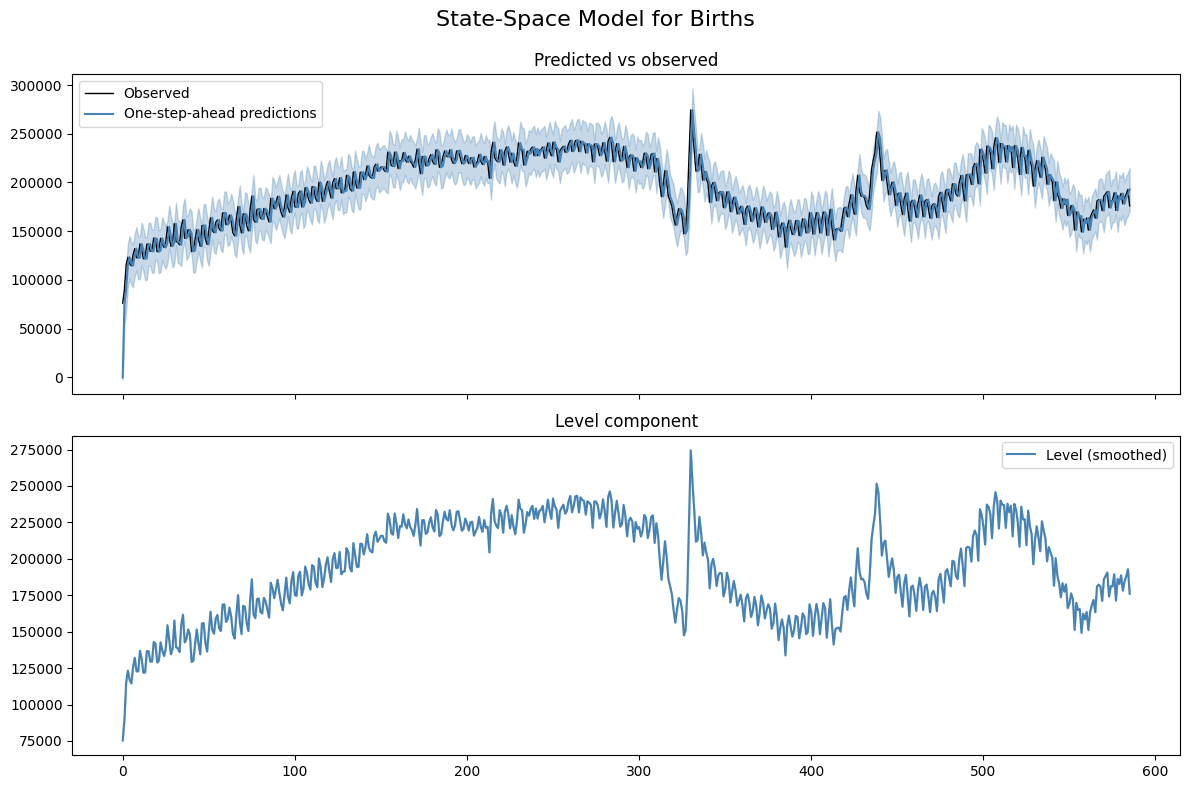


Error Metrics for Births:
  MAE  = 9,177
  RMSE = 11,608
  MAPE = 5.02%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def run_ucm(df, series_name, title):
    series = df[series_name].dropna()

    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    # One-step-ahead predictions
    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'State-Space Model for {title}', fontsize=16)

    # Plot observed vs predicted
    axes[0].plot(series.index, series, label='Observed', color='black', linewidth=1)
    axes[0].plot(mean.index, mean, label='One-step-ahead predictions', color='steelblue')
    axes[0].fill_between(mean.index, ci.iloc[:, 0], ci.iloc[:, 1], color='steelblue', alpha=0.3)
    axes[0].legend()
    axes[0].set_title('Predicted vs observed')

    # Extract smoothed level from results.smoothed_state
    smoothed_level = results.smoothed_state[0]  # Index 0 is level component
    smoothed_index = series.index

    # Smoothed level confidence intervals
    level_var = results.smoothed_state_cov[0, 0, :]  # variance of level
    level_std = np.sqrt(level_var)
    lower = smoothed_level - 1.96 * level_std
    upper = smoothed_level + 1.96 * level_std

    axes[1].plot(smoothed_index, smoothed_level, label='Level (smoothed)', color='steelblue')
    axes[1].fill_between(smoothed_index, lower, upper, color='steelblue', alpha=0.3)
    axes[1].set_title('Level component')
    axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.savefig(f'statespace_{series_name.lower()}.png')
    plt.show()

    # Error metrics
    observed = series.loc[mean.index].dropna()
    predicted = mean.loc[observed.index].dropna()
    observed, predicted = observed.align(predicted, join='inner')

    mae = mean_absolute_error(observed, predicted)
    rmse = np.sqrt(mean_squared_error(observed, predicted))
    mape = mean_absolute_percentage_error(observed, predicted)

    print(f"\nError Metrics for {title}:")
    print(f"  MAE  = {mae:,.0f}")
    print(f"  RMSE = {rmse:,.0f}")
    print(f"  MAPE = {mape:.2%}")

url = "https://raw.githubusercontent.com/kylejones200/time_series/refs/heads/main/Uk%20vital%20statistics%20data%20cleaned_data.csv"
df = pd.read_csv(url)

run_ucm(df, 'Births', 'Births')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from PIL import Image
import io

def run_ucm_with_gif(df, series_name, title):
    series = df[series_name].dropna()
    model = UnobservedComponents(series, level='local level')
    results = model.fit(disp=False)

    pred = results.get_prediction()
    mean = pred.predicted_mean
    ci = pred.conf_int()

    smoothed_level = results.smoothed_state[0]
    smoothed_index = series.index

    level_var = results.smoothed_state_cov[0, 0, :]
    level_std = np.sqrt(level_var)
    lower = smoothed_level - 1.96 * level_std
    upper = smoothed_level + 1.96 * level_std

    frames = []
    for i in range(10, len(series)):
        fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        fig.suptitle(f'State-Space Model for {title}', fontsize=16)

        # Observed vs predicted up to index i
        axes[0].plot(series.index[:i], series.values[:i], label='Observed', color='black', linewidth=1)
        axes[0].plot(mean.index[:i], mean.values[:i], label='Prediction', color='steelblue')
        axes[0].fill_between(mean.index[:i], ci.iloc[:i, 0], ci.iloc[:i, 1], color='steelblue', alpha=0.3)
        axes[0].legend()
        axes[0].set_title('Predicted vs observed')

        # Smoothed level up to index i
        axes[1].plot(smoothed_index[:i], smoothed_level[:i], label='Level (smoothed)', color='steelblue')
        axes[1].fill_between(smoothed_index[:i], lower[:i], upper[:i], color='steelblue', alpha=0.3)
        axes[1].set_title('Level component')
        axes[1].legend()

        plt.tight_layout()
        plt.subplots_adjust(top=0.90)

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        frames.append(image.convert("RGB"))
        plt.close()

    frames[0].save(f'statespace_{series_name.lower()}.gif',
                   format='GIF',
                   save_all=True,
                   append_images=frames[1:],
                   duration=150,
                   loop=0)

    # Print error metrics
    observed = series.loc[mean.index].dropna()
    predicted = mean.loc[observed.index].dropna()
    observed, predicted = observed.align(predicted, join='inner')

    mae = mean_absolute_error(observed, predicted)
    rmse = np.sqrt(mean_squared_error(observed, predicted))
    mape = mean_absolute_percentage_error(observed, predicted)

    print(f"\nError Metrics for {title}:")
    print(f"  MAE  = {mae:,.0f}")
    print(f"  RMSE = {rmse:,.0f}")
    print(f"  MAPE = {mape:.2%}")

# Load data
url = "https://raw.githubusercontent.com/kylejones200/time_series/refs/heads/main/Uk%20vital%20statistics%20data%20cleaned_data.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Run
run_ucm_with_gif(df, 'Births', 'Births')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)



Error Metrics for Births:
  MAE  = 9,177
  RMSE = 11,608
  MAPE = 5.02%
